In [8]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d abecklas/fifa-world-cup

100% 349k/349k [00:00<00:00, 680kB/s]
100% 349k/349k [00:00<00:00, 680kB/s]


In [ ]:
!unzip fifa-world-cup.zip

Archive:  fifa-world-cup.zip
  inflating: WorldCupMatches.csv     
  inflating: WorldCupPlayers.csv     
  inflating: WorldCups.csv           


In [ ]:
players = pd.read_csv("WorldCupPlayers.csv")
matches = pd.read_csv("WorldCupMatches.csv")
world_cup = pd.read_csv("WorldCups.csv")

In [ ]:
matches.dropna(subset=['Year'], inplace=True)
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
wrong = list(names.index)
correct = [name.split('>')[1] for name in wrong]
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana', "C�te d'Ivoire"]
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium', "cote d'ivoire"]
wrong = wrong + old_name
correct = correct + new_name

In [ ]:
matches.isna().any(axis=0)

Year                    False
Datetime                False
Stage                   False
Stadium                 False
City                    False
Home Team Name          False
Home Team Goals         False
Away Team Goals         False
Away Team Name          False
Win conditions          False
Attendance               True
Half-time Home Goals    False
Half-time Away Goals    False
Referee                 False
Assistant 1             False
Assistant 2             False
RoundID                 False
MatchID                 False
Home Team Initials      False
Away Team Initials      False
dtype: bool

In [ ]:
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])

In [ ]:
matches = matches.rename(columns={x:x.lower().replace(' ', '_') for x in matches.columns})

In [ ]:
matches.head()

,year,datetime,stage,stadium,city,home_team_name,home_team_goals,away_team_goals,away_team_name,win_conditions,attendance,half-time_home_goals,half-time_away_goals,referee,assistant_1,assistant_2,roundid,matchid,home_team_initials,away_team_initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
matches['home_team_name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Soviet Union',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR',
       'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic',
       'Iraq', 'Denmark', 'United Arab Emirates', 'Costa Rica',
       'Cameroon', 'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria',
       'Saudi Arabia', 'Bolivia', 'Russia', 'Greece', 'Jamaica',
       'South Africa', 'Japan', 'Croatia', 'China PR', 'Senegal',
       'Slovenia', 'Ecuador', 'Trinidad and Tobago',
       'Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "cote d'ivoire", 'Ghana', 'Ukraine', 'Serbia',
      

In [ ]:
appearences = pd.DataFrame(matches['home_team_name'].value_counts()).join(pd.DataFrame(matches['away_team_name'].value_counts()))
appearences = appearences.rename(columns = {'home_team_name':'home_appearences', 'away_team_name':'away_appearences'})
appearences['total'] = appearences['home_appearences'] + appearences['away_appearences']
appearences

,home_appearences,away_appearences,total
Brazil,82,26,108
Germany,77,33,110
Italy,57,26,83
Argentina,54,27,81
England,35,27,62
...,...,...,...
Wales,1,4,5
Norway,1,7,8
United Arab Emirates,1,2,3
Haiti,1,2,3


In [ ]:
winner = world_cup['Winner'].value_counts()
runnerup = world_cup['Runners-Up'].value_counts()
third = world_cup['Third'].value_counts()
teams_podium = pd.concat([winner, runnerup, third], axis=1)
teams_podium.fillna(0, inplace=True)
teams_podium = teams_podium.astype(int)
teams_podium

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [ ]:
home = matches[['home_team_name', 'home_team_goals']].groupby(by='home_team_name', as_index=False).sum()
away = matches[['away_team_name', 'away_team_goals']].rename(columns={'away_team_name':'home_team_name'}).groupby(by='home_team_name', as_index=False).sum()
goals = away.join(home.set_index('home_team_name'), on='home_team_name')
goals

,home_team_name,away_team_goals,home_team_goals
0,Algeria,9.0,5.0
1,Angola,1.0,0.0
2,Argentina,22.0,111.0
3,Australia,4.0,7.0
4,Austria,12.0,31.0
...,...,...,...
77,Uruguay,18.0,62.0
78,Wales,2.0,2.0
79,Yugoslavia,18.0,42.0
80,Zaire,0.0,0.0


In [ ]:
len(goals.home_team_name.unique())

82

In [ ]:
country_data = goals.join(appearences, on='home_team_name')
country_data['total_scored_goals'] = country_data['home_team_goals'] +  country_data['away_team_goals']

In [ ]:
country_data['goal_rate'] = country_data['total_scored_goals'] / country_data['total']

In [ ]:
country_data.head()

,home_team_name,away_team_goals,home_team_goals,home_appearences,away_appearences,total,total_scored_goals,goal_rate
0,Algeria,9.0,5.0,6.0,8.0,14.0,14.0,1.000000
1,Angola,1.0,0.0,1.0,2.0,3.0,1.0,0.333333
2,Argentina,22.0,111.0,54.0,27.0,81.0,133.0,1.641975
3,Australia,4.0,7.0,6.0,7.0,13.0,11.0,0.846154
4,Austria,12.0,31.0,13.0,16.0,29.0,43.0,1.482759


## visualization 

In [ ]:
import panel as pn
from bokeh.sampledata.country_data import country_data
from io import StringIO

pn.extension(sizing_mode="stretch_width")

In [ ]:
name = pn.widgets.MultiChoice(
    name='National team', options=list(country_data.home_team_name.unique()), margin=(0, 20, 0, 0)
)
mpg = pn.widgets.RangeSlider(
    name='goal rate', start=country_data.goal_rate.min(), end=country_data.goal_rate.max()
)

@pn.depends(name, mpg)
def filtered_data(yrs, mpg):
    df = country_data
    if name.value:
        df = country_data[country_data.home_team_name.isin(yrs)]
    return df[(df.goal_rate >= mpg[0]) & (df.goal_rate <= mpg[1])]

@pn.depends(name, mpg)
def filtered_file(nm, mpg):
    df = filtered_data(nm, mpg)
    sio = StringIO()
    df.to_csv(sio)
    sio.seek(0)
    return sio

fd = pn.widgets.FileDownload(
    callback=filtered_file, filename='filtered_country_data.csv'
)

pn.Column(pn.Row(name, mpg), fd, pn.panel(filtered_data, width=600), width=600)

Column(sizing_mode='stretch_width', width=600)
    [0] Row(sizing_mode='stretch_width')
        [0] MultiChoice(margin=(0, 20, 0, 0), name='National team', options=['Algeria', 'Angola', ...], sizing_mode='stretch_width')
        [1] RangeSlider(end=2.71875, name='goal rate', sizing_mode='stretch_width', value=(0.0, 2.71875), value_end=2.71875)
    [1] FileDownload(callback=<function filtered_file a..., filename='filtered_country_data.csv..., label='Download filtered_country..., sizing_mode='stretch_width')
    [2] ParamFunction(function, sizing_mode='stretch_width', width=600)

# World cup 2018 data 

In [98]:
!pip install highlight_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
!pip install missingno mplsoccer soccerplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
!pip install kloppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!git clone https://github.com/statsbomb/open-data.git

Cloning into 'open-data'...
remote: Enumerating objects: 25403, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 25403 (delta 33), reused 48 (delta 27), pack-reused 25346
Receiving objects: 100% (25403/25403), 2.19 GiB | 19.54 MiB/s, done.
Resolving deltas: 100% (23178/23178), done.
Checking out files: 100% (2639/2639), done.


In [90]:
!git clone https://github.com/metrica-sports/sample-data.git

Cloning into 'sample-data'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 60
Unpacking objects: 100% (63/63), done.
Checking out files: 100% (11/11), done.


In [14]:
!git clone https://github.com/sharmaabhishekk/passmaps.git

Cloning into 'passmaps'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


Read data 

In [1]:
import pandas as pd
import json
import datetime 

competition = pd.read_json('open-data/data/competitions.json')
competition.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [2]:
competition[competition.competition_name == 'FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
18,43,3,International,FIFA World Cup,male,False,True,2018,2022-09-05T17:17:56.670896,2021-06-13T16:17:31.694,None,2022-09-05T17:17:56.670896


In [3]:
with open('open-data/data/matches/43/3.json') as f:
    data = json.load(f)
    for i in data:
        print('ID:', i['match_id'], i['home_team']['home_team_name'], i['home_score'], '-', i['away_score'], i['away_team']['away_team_name'])

ID: 7548 Brazil 2 - 0 Costa Rica
ID: 7578 Egypt 0 - 1 Uruguay
ID: 7553 South Korea 1 - 2 Mexico
ID: 7544 Uruguay 1 - 0 Saudi Arabia
ID: 7536 Belgium 3 - 0 Panama
ID: 7555 Poland 0 - 3 Colombia
ID: 7546 France 1 - 0 Peru
ID: 7539 Poland 1 - 2 Senegal
ID: 7538 Sweden 1 - 0 South Korea
ID: 7576 Portugal 3 - 3 Spain
ID: 7565 Serbia 0 - 2 Brazil
ID: 7551 Germany 2 - 1 Sweden
ID: 7550 Serbia 1 - 2 Switzerland
ID: 7537 Tunisia 1 - 2 England
ID: 7580 France 4 - 3 Argentina
ID: 8650 Brazil 1 - 2 Belgium
ID: 7581 Croatia 1 - 1 Denmark
ID: 7549 Nigeria 2 - 0 Iceland
ID: 7529 Croatia 2 - 0 Nigeria
ID: 7534 Germany 0 - 1 Mexico
ID: 7562 Australia 0 - 2 Peru
ID: 7571 Senegal 0 - 1 Colombia
ID: 7569 Panama 1 - 2 Tunisia
ID: 7568 Switzerland 2 - 2 Costa Rica
ID: 7530 France 2 - 1 Australia
ID: 7558 Uruguay 3 - 0 Russia
ID: 7583 Brazil 2 - 0 Mexico
ID: 7547 Denmark 1 - 1 Australia
ID: 7535 Costa Rica 0 - 1 Serbia
ID: 7584 Belgium 3 - 2 Japan
ID: 7545 Argentina 0 - 3 Croatia
ID: 8649 Uruguay 0 - 2 Franc

In [4]:
with open('open-data/data/matches/43/3.json') as f:
    data = json.load(f)
    arg_ids = [id['match_id'] for id in data if (id['home_team']['home_team_name'] == 'Argentina') | (id['away_team']['away_team_name'] == 'Argentina')]   

In [5]:
arg_data = {datos['match_id']:datos for datos in data if datos['match_id'] in arg_ids}

In [6]:
def make_event_df(id:int, data:dict) -> pd.DataFrame:
    with open('open-data/data/events/{}.json'.format(id)) as f:
        eventsdf = json.load(f)
        df = pd.json_normalize(eventsdf, sep='_').assign(match_id=id)
        df['Team'] = 0 
        df.loc[df.team_name == arg_data[id]['home_team']['home_team_name'], 'Team'] = 'Home'
        df.loc[df.team_name == arg_data[id]['away_team']['away_team_name'], 'Team'] = 'Away'
        df['timestamp'].apply(lambda x: pd.Timestamp(x))
        df['duration'] = df['duration'].fillna(0)
        df['duration'] = df['duration'].apply(lambda x: datetime.timedelta(seconds = x))
        df['Start Time [s]'] = df['timestamp'].apply(lambda x: pd.Timestamp(x))
        df['End Time [s]'] = df['Start Time [s]'] + df['duration']
        df['location_x'] = df.location.apply(lambda x: x[0] if type(x) == list else np.nan)
        df['End X'] = df.pass_end_location.apply(lambda x: x[0] if type(x) == list else np.nan)
        df['location_y'] = df.location.apply(lambda x: x[1] if type(x) == list else np.nan)
        df['End Y'] = df.pass_end_location.apply(lambda x: x[1] if type(x) == list else np.nan)
        return df 

In [9]:
eventdf = make_event_df(arg_ids[0], arg_data)

shots plotting


In [10]:
shots = eventdf[eventdf.type_name == 'Shot'].set_index('id')
shots.head()

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,under_pressure,foul_won_defensive,ball_receipt_outcome_id,ball_receipt_outcome_name,counterpress,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,interception_outcome_id,interception_outcome_name,pass_backheel,pass_cross,pass_switch,dribble_overrun,dribble_outcome_id,dribble_outcome_name,ball_recovery_recovery_failure,shot_statsbomb_xg,shot_end_location,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,pass_aerial_won,foul_committed_penalty,foul_won_penalty,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,pass_deflected,block_deflection,pass_miscommunication,dribble_nutmeg,clearance_aerial_won,pass_assisted_shot_id,pass_goal_assist,shot_key_pass_id,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,block_offensive,shot_redirect,bad_behaviour_card_id,bad_behaviour_card_name,shot_first_time,pass_shot_assist,goalkeeper_body_part_id,goalkeeper_body_part_name,50_50_outcome_id,50_50_outcome_name,ball_recovery_offensive,goalkeeper_technique_id,goalkeeper_technique_name,shot_one_on_one,match_id,Team,Start Time [s],End Time [s],location_x,End X,location_y,End Y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29e12597-e770-481f-b47d-c1ebb54247da,281,1,00:08:24.267,8,24,14,0 days 00:00:01.293000,16,Shot,771,France,3,From Free Kick,771,France,NaN,NaN,[2ee7a5c8-d3f7-4031-98be-d457171a8657],"[95.0, 50.0]",5487.0,Antoine Griezmann,7.0,Right Wing Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065490,"[120.0, 43.0, 2.7]",38.0,Left Foot,93.0,Normal,62.0,Free Kick,99.0,Post,"[{'location': [106.0, 54.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580,Home,2022-11-24 00:08:24.267,2022-11-24 00:08:25.560,95.0,NaN,50.0,NaN
5777e16b-766a-443a-afde-abeef8336b8f,439,1,00:12:42.360,12,42,19,0 days 00:00:00.840000,16,Shot,771,France,5,Other,771,France,NaN,NaN,[e4141f4f-d8c0-48cf-865a-c7f1a2694d69],"[108.0, 40.0]",5487.0,Antoine Griezmann,7.0,Right Wing Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,"[120.0, 38.3, 0.2]",38.0,Left Foot,93.0,Normal,88.0,Penalty,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580,Home,2022-11-24 00:12:42.360,2022-11-24 00:12:43.200,108.0,NaN,40.0,NaN
58b338af-ba6f-4ee0-8be6-253acaf3ae32,720,1,00:20:33.347,20,33,30,0 days 00:00:01.213000,16,Shot,771,France,3,From Free Kick,771,France,NaN,NaN,[32a3f4c5-b56b-4c1a-a01e-f0fe5ccf1052],"[102.0, 33.0]",20004.0,Paul Pogba,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078683,"[120.0, 44.4, 3.8]",40.0,Right Foot,93.0,Normal,62.0,Free Kick,98.0,Off T,"[{'location': [113.0, 34.0], 'player': {'id': ...",Na

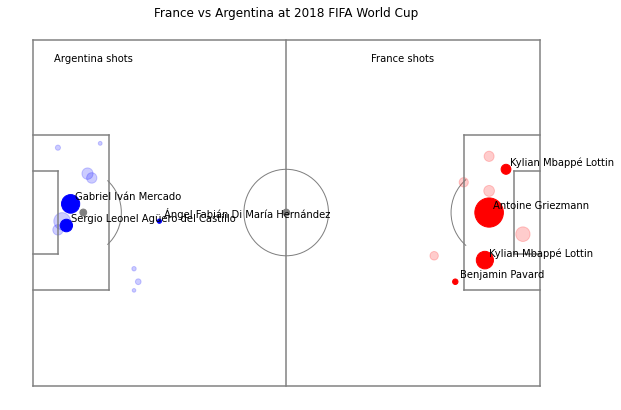

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from FCPython import createPitch

pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

home_team = arg_data[arg_ids[0]]['home_team']['home_team_name']
away_team = arg_data[arg_ids[0]]['away_team']['away_team_name']

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circle_size = 2
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    
    if team_name == home_team:
        if goal:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
            plt.text((x+1), pitch_height-y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
            shot_circle.set_alpha(.2)
    elif team_name == away_team:
        if goal:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='blue')
            plt.text((pitch_width-x+1), y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='blue')
            shot_circle.set_alpha(.2)
    
    ax.add_patch(shot_circle)
    
plt.text(5, 75, away_team + ' shots')
plt.text(80, 75, home_team + ' shots')

plt.title('France vs Argentina at 2018 FIFA World Cup')

fig.set_size_inches(10, 7)
fig.savefig('shots.png', dpi=300) 

plt.show()

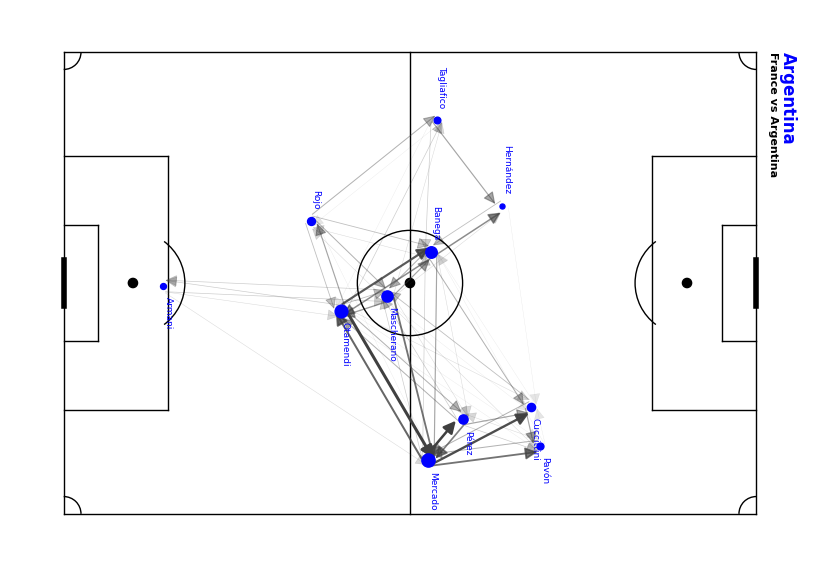

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pandas import json_normalize
import numpy as np
from passmaps.pitch import Pitch
import warnings

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

match_id = arg_ids[0]
side="away"
color="blue"
min_pass_count = 2 ##minimum number of passes for a link to be plotted

fig, ax = plt.subplots(figsize=(10,6))
ax = Pitch(ax)


class Player:
    def __init__(self, player, df):
        self.id = player["player"]["id"]
        self.name = player["player"]["name"]
        self.average_position(df)

    def average_position(self, df):

        player_pass_df = df.query("(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) & (player_id == @self.id) & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
        self.x, self.y = np.mean(player_pass_df['location'].tolist(), axis=0)

        self.n_passes_completed = len(player_pass_df)
        

def load_file(match_id, getter="remote", path = None):
    
    if getter == "local":
        with open(f"{path}/{match_id}.json", "r", encoding="utf-8") as f:
            match_dict = json.load(f)
            df = json_normalize(match_dict, sep="_")
            df = df.query("location == location")
            df[['x','y']] = pd.DataFrame(df.location.values.tolist(), index= df.index)
            df['y'] = 80 - df['y']
            df['location'] = df[['x', 'y']].apply(list, axis=1)
            
        return match_dict, df
    
    elif getter == "remote":
        resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json")

        match_dict = json.loads(resp.text)
        df = json_normalize(match_dict, sep="_")
        df = df.query("location == location")
        df[['x','y']] = pd.DataFrame(df.location.values.tolist(), index= df.index)
        df['y'] = 80 - df['y']
        df['location'] = df[['x', 'y']].apply(list, axis=1)        

        return match_dict, df
    

def get_starters(match_dict, side="home"):
    """ """
    lineups = match_dict[0]["tactics"]["lineup"] if side == "home" else match_dict[1]["tactics"]["lineup"]
    return lineups

#######

##Calling the functions and getting the data
match_dict, df = load_file(match_id, getter="remote")
lineups = get_starters(match_dict, side=side)


###
side_dict = {"home": match_dict[0]["team"]["name"],
             "away": match_dict[1]["team"]["name"] } ##For easy lookup for the title and so on

player_objs_dict = {}
starters = []
for player in lineups:
    starters.append(player["player"]["name"]) ##To remove all substitutes from our final grouped_df
    p = Player(player, df) ##Calling the Player class
    player_objs_dict.update({player["player"]["name"]: p}) ##For lookup during plotting the grouped_df
    
##Cleaning the grouped df
    
total_pass_df = df.query(f"(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) &"\
                                 f"(team_name == '{side_dict[side]}') & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
total_pass_df = total_pass_df.groupby(["player_name", "pass_recipient_name"]).size().reset_index(name="count")
total_pass_df = total_pass_df.query(" (player_name == @starters) & (pass_recipient_name == @starters) & (count>=@min_pass_count) ")

arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5 ##Units by which the arrow is shortened from the end_points

##Visualising the passmap

for row in total_pass_df.itertuples():
    
    link = row[3] ## for the arrow-width and the alpha 
    passer = player_objs_dict[row[1]]        
    receiver = player_objs_dict[row[2]]        
            
    alpha = link/15
    if alpha >1:
        alpha=1
        
    if abs( receiver.x - passer.x) > abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x, receiver.y + arrow_shift), xytext=(passer.x, passer.y + arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw = link*0.12, alpha=alpha))
            
        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x, receiver.y - arrow_shift), xytext=(passer.x, passer.y - arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

    elif abs(receiver.x - passer.x) <= abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x + arrow_shift, receiver.y), xytext=(passer.x + arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))
            
        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x - arrow_shift, receiver.y), xytext=(passer.x - arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))        

for name, player in player_objs_dict.items():
    
    ax.scatter(player.x, player.y, s=player.n_passes_completed*1.3, color=color, zorder = 4)
    ax.text(player.x, player.y+2 if player.y >40 else player.y -2, s=player.name.split(" ")[-1], rotation=270, va="top" if player.y<40 else "bottom", size=6.5, fontweight="book", zorder=7, color=color)
    
ax.text(124, 80, f"{side_dict[side]}", size=12, fontweight="demibold", rotation=270, color=color, va="top")
ax.text(122, 80, f"{side_dict['home']} vs {side_dict['away']}", size=8, fontweight="demibold", rotation = 270, va="top")

fig.tight_layout()
plt.show()